<a href="https://colab.research.google.com/github/gerardopdm/ml-ejemplos/blob/master/NN-Clasificacion_circulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##### from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import random as rd
import time
from IPython import display

from sklearn.model_selection import train_test_split

print(tf.__version__)

1.14.0-rc1


In [0]:
def curva_arreglo( df, center_x, center_y, radio, ruido ):
    y_list = []
    for n in range(df.shape[0]):
        x= df.iloc[n][0] -(ruido/2)+np.random.randint(ruido)
        y= df.iloc[n][1] -(ruido/2)+np.random.randint(ruido)
        if ( (x - center_x)**2 + (y - center_y)**2 < radio**2 ):
            dentro=1
        else:
            dentro=0
        # Coloca una linea vertical
        if (x > 30 and x < 40): dentro=1
        # Coloca una linea horizontal
        if (y > 30 and y < 35): dentro=1
        y_list.append([dentro])
    return np.array(y_list)

In [0]:
df=pd.DataFrame()

In [0]:
no_puntos=50000
df["X1"]=np.random.rand(no_puntos)*100-50
df["X2"]=np.random.rand(no_puntos)*100-50

In [0]:
df["y"] = curva_arreglo( df, 0, 0, 20, 5 )

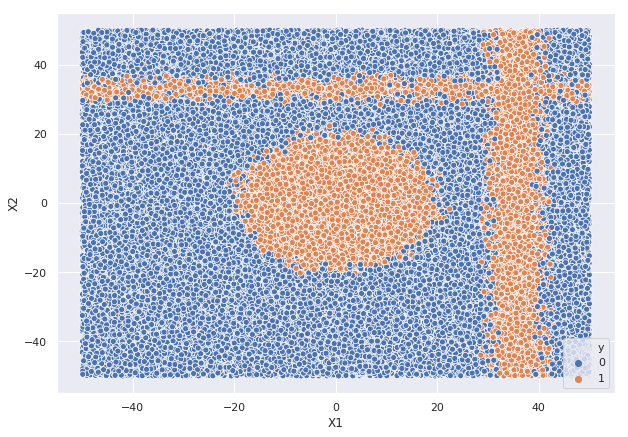

In [26]:
#plt.scatter(df["x1"],df["x2"], marker=".", hue=y)
sns.set(rc={'figure.figsize':(10,7)})
sns.scatterplot(x="X1",y="X2", data=df, hue="y")

In [0]:
X=df[["X1","X2"]].values
y=df[["y"]].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [0]:
#df=pd.get_dummies(df, columns=["y"]).head(50)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(8, input_shape=[2], activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 18        
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history=model.fit(X_train, y_train, epochs=70, validation_split = 0.2, verbose=2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/70
32000/32000 - 1s - loss: 0.5150 - acc: 0.7455 - val_loss: 0.4260 - val_acc: 0.7686
Epoch 2/70
32000/32000 - 1s - loss: 0.4141 - acc: 0.7645 - val_loss: 0.4043 - val_acc: 0.7607
Epoch 3/70
32000/32000 - 1s - loss: 0.4039 - acc: 0.7595 - val_loss: 0.3982 - val_acc: 0.7619
Epoch 4/70
32000/32000 - 1s - loss: 0.3954 - acc: 0.7616 - val_loss: 0.3858 - val_acc: 0.7591
Epoch 5/70
32000/32000 - 1s - loss: 0.3857 - acc: 0.7663 - val_loss: 0.3783 - val_acc: 0.7897
Epoch 6/70
32000/32000 - 1s - loss: 0.3764 - acc: 0.7748 - val_loss: 0.3660 - val_acc: 0.7879
Epoch 7/70
32000/32000 - 1s - loss: 0.3669 - acc: 0.7905 - val_loss: 0.3622 - val_acc: 0.7905
Epoch 8/70
32000/32000 - 1s - loss: 0.3558 - acc: 0.8025 - val_loss: 0.3430 - val_acc: 0.8299
Epoch 9/70
32000/32000 - 1s - loss: 0.3438 - acc: 0.8226 - val_loss: 0.3321 - val_acc: 0.8304
Epoch 10/70
32000/32000 - 1s - loss: 0.3317 - acc: 0.8317 - val_loss: 0.3214 - val_acc: 0.8372
Epoch 11/7

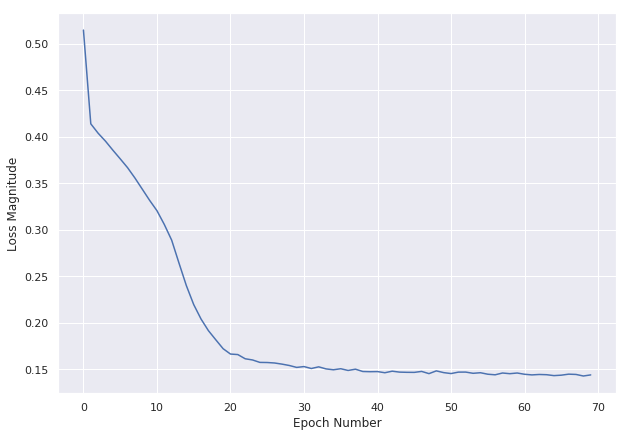

In [33]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

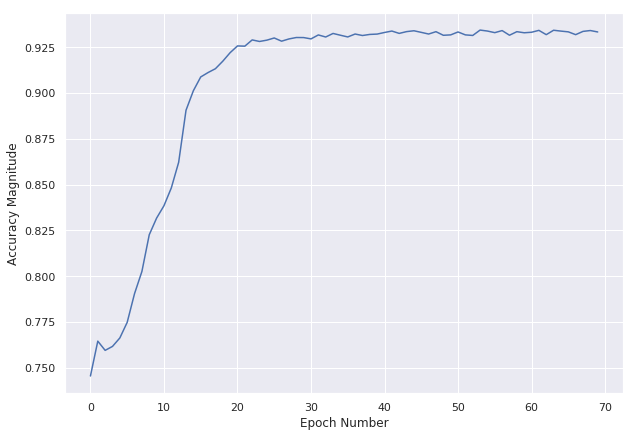

In [34]:
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy Magnitude")
plt.plot(history.history['acc'])

In [0]:
pred_y = model.predict(X_test)

In [36]:
pred_y.shape

(10000, 2)

In [37]:
for i,x in enumerate(pred_y):
  print(i,x)
  if (i==10):
    break

0 [0.16122514 0.8387749 ]
1 [9.9988353e-01 1.1640749e-04]
2 [9.9981040e-01 1.8957096e-04]
3 [9.9999344e-01 6.5002982e-06]
4 [0.00364009 0.9963599 ]
5 [9.9985814e-01 1.4186448e-04]
6 [9.9999738e-01 2.5957727e-06]
7 [1.000000e+00 3.886959e-09]
8 [1.0000000e+00 7.7405894e-16]
9 [1.000000e+00 5.236984e-09]
10 [0.01248033 0.9875196 ]


In [38]:
pred_y[:,0]

array([0.16122514, 0.99988353, 0.9998104 , ..., 0.9935387 , 0.6355623 ,
       0.9999994 ], dtype=float32)

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.1411 - acc: 0.9342
Test accuracy: 0.9342


In [40]:
X_test.shape

(10000, 2)

In [41]:
X_test[:,1].shape

(10000,)

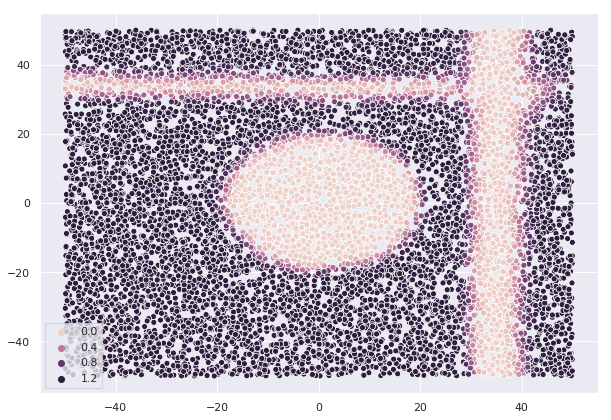

In [42]:
sns.scatterplot(x=X_test[:,0],y=X_test[:,1], hue=pred_y[:,0])